In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv("C:/Users/Arabtech/Downloads/jupyter_files/online_retail_II.csv")

In [3]:
print(data)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer ID         Country  
0        2009-12-01 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
# we have 1067371 rows>> there is null in Description col & Customer ID col
# we will drop the nulls
data.dropna(inplace=True)

In [6]:
data.info() # Show informations after drop nulls

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [7]:
data.drop_duplicates(inplace=True) # remove duplicated rows

In [8]:
data.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Quantity col has a negative min --> we will remove the negative : delete the values or change the sign by *-1
# To know where the negative exactly
sum=0
for index, value in data['Quantity'].items():
    if value < 0:
        sum=sum+1
        print(f"Row {index+1} has a value less than 0: {value}")

print("Sum of negative values = ",sum) 

Row 179 has a value less than 0: -12
Row 180 has a value less than 0: -6
Row 181 has a value less than 0: -4
Row 182 has a value less than 0: -6
Row 183 has a value less than 0: -12
Row 184 has a value less than 0: -12
Row 185 has a value less than 0: -12
Row 186 has a value less than 0: -24
Row 187 has a value less than 0: -12
Row 197 has a value less than 0: -3
Row 198 has a value less than 0: -3
Row 199 has a value less than 0: -3
Row 200 has a value less than 0: -3
Row 201 has a value less than 0: -3
Row 202 has a value less than 0: -3
Row 203 has a value less than 0: -3
Row 204 has a value less than 0: -3
Row 205 has a value less than 0: -3
Row 206 has a value less than 0: -3
Row 207 has a value less than 0: -3
Row 208 has a value less than 0: -3
Row 209 has a value less than 0: -2
Row 286 has a value less than 0: -6
Row 317 has a value less than 0: -2
Row 318 has a value less than 0: -1
Row 319 has a value less than 0: -6
Row 400 has a value less than 0: -2
Row 401 has a value le

In [10]:
data = data[(data['Quantity']>0)]  # To remove any negative values in Quantity column

In [11]:
sum=0
for index, value in data['Customer ID'].items():
    if value < 0:
        sum=sum+1
        print(f"Row {index+1} has a value less than 0: {value}")

print("Sum of negative values = ",sum) 

Sum of negative values =  0


In [12]:
sum=0
for index, value in data['Price'].items():
    if value < 0:
        sum=sum+1
        print(f"Row {index+1} has a value less than 0: {value}")

print("Sum of negative values = ",sum) 

Sum of negative values =  0


In [13]:
data.describe()

,Quantity,Price,Customer ID
count,779495.000000,779495.000000,779495.000000
mean,13.507085,3.218199,15320.262918
std,146.540284,29.674823,1695.722988
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13971.000000
50%,6.000000,1.950000,15246.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,10953.500000,18287.000000


In [14]:
#create a new dataframe to know the real number of customers
# we don't take the customers with same id & from the same country
filtered_data=data[['Country','Customer ID']].drop_duplicates()  # will contain unique combinations of 'Country' and 'Customer ID'

<Axes: xlabel='Country'>

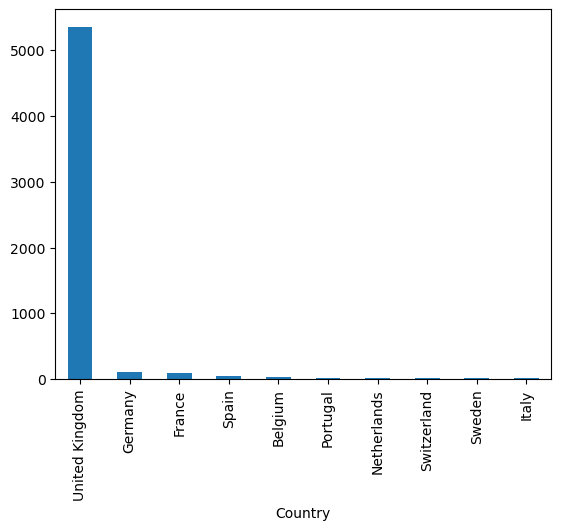

In [15]:
filtered_data.Country.value_counts()[:10].plot(kind='bar') # visualize with bar plot to see number of customers from each country

In [16]:
#  you can observe most of the customers are from the UK. So, we can filter data for UK customers.
uk_data=data[data.Country=="United Kingdom"]

In [17]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700434 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      700434 non-null  object 
 1   StockCode    700434 non-null  object 
 2   Description  700434 non-null  object 
 3   Quantity     700434 non-null  int64  
 4   InvoiceDate  700434 non-null  object 
 5   Price        700434 non-null  float64
 6   Customer ID  700434 non-null  float64
 7   Country      700434 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 48.1+ MB


In [18]:
print(data.nunique())
print("---------------------")
print(uk_data.nunique())

Invoice        36975
StockCode       4631
Description     5283
Quantity         438
InvoiceDate    34591
Price            666
Customer ID     5881
Country           41
dtype: int64
---------------------
Invoice        33546
StockCode       4616
Description     5249
Quantity         405
InvoiceDate    31562
Price            553
Customer ID     5353
Country            1
dtype: int64


In [19]:
uk_data=uk_data[['Customer ID','InvoiceDate','Invoice','Quantity','Price']] # Important columns for analysis

In [20]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price'] 

In [21]:
uk_data['InvoiceDate'].min()
uk_data['InvoiceDate'].max()
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [22]:
uk_data.head()

,Customer ID,InvoiceDate,Invoice,Quantity,Price,TotalPrice
0,13085.0,2009-12-01 07:45:00,489434,12,6.95,83.4
1,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
2,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
3,13085.0,2009-12-01 07:45:00,489434,48,2.10,100.8
4,13085.0,2009-12-01 07:45:00,489434,24,1.25,30.0


In [23]:
# RFM Analysis
rfm = uk_data.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (PRESENT - date.max()).days,  # Recency
    'Invoice': lambda num: len(num),  # Frequency
    'TotalPrice': lambda price: price.sum()  # Monetary
}).reset_index()

In [24]:
rfm.head(6)

,Customer ID,InvoiceDate,Invoice,TotalPrice
0,12346.0,325,34,77556.46
1,12608.0,404,16,415.79
2,12745.0,486,22,723.85
3,12746.0,540,17,254.55
4,12747.0,2,249,8898.48
5,12748.0,0,6587,53539.64


In [25]:
rfm.describe()

,Customer ID,InvoiceDate,Invoice,TotalPrice
count,5353.000000,5353.000000,5353.000000,5353.000000
mean,15556.524566,202.683729,130.848870,2688.069291
std,1581.187812,210.120997,313.400993,11703.419139
min,12346.000000,0.000000,1.000000,0.000000
25%,14190.000000,25.000000,20.000000,330.000000
50%,15564.000000,98.000000,52.000000,828.810000
75%,16922.000000,381.000000,137.000000,2155.950000
max,18287.000000,738.000000,12435.000000,580987.040000


In [26]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5353 non-null   float64
 1   InvoiceDate  5353 non-null   int64  
 2   Invoice      5353 non-null   int64  
 3   TotalPrice   5353 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 167.4 KB


In [27]:
# Change the name of columns
rfm.columns=['Customer ID','recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int) 
print(rfm.head())

   Customer ID  recency  frequency  monetary
0      12346.0      325         34  77556.46
1      12608.0      404         16    415.79
2      12745.0      486         22    723.85
3      12746.0      540         17    254.55
4      12747.0        2        249   8898.48


In [28]:
# Creating recency quartiles
rfm['R'] = pd.qcut(rfm['recency'], 4, labels=['1', '2', '3', '4'])

# Creating frequency quartiles
rfm['F'] = pd.qcut(rfm['frequency'], 4, labels=['4', '3', '2', '1'])

# Creating monetary quartiles
rfm['M'] = pd.qcut(rfm['monetary'], 4, labels=['4', '3', '2', '1'])


In [29]:
print(rfm.head())

   Customer ID  recency  frequency  monetary  R  F  M
0      12346.0      325         34  77556.46  3  3  1
1      12608.0      404         16    415.79  4  4  3
2      12745.0      486         22    723.85  4  3  3
3      12746.0      540         17    254.55  4  4  4
4      12747.0        2        249   8898.48  1  1  1


In [30]:
rfm['RFM_Score'] = rfm.R.astype(str) + rfm.F.astype(str) + rfm.M.astype(str)
# Concatenating quartile labels into a single string for each customer
# RFM_Score will contain the combined score for recency, frequency, monetary values

In [31]:
print(rfm.head(6))

   Customer ID  recency  frequency  monetary  R  F  M RFM_Score
0      12346.0      325         34  77556.46  3  3  1       331
1      12608.0      404         16    415.79  4  4  3       443
2      12745.0      486         22    723.85  4  3  3       433
3      12746.0      540         17    254.55  4  4  4       444
4      12747.0        2        249   8898.48  1  1  1       111
5      12748.0        0       6587  53539.64  1  1  1       111


In [44]:
# Filter out Best customers
print(rfm[rfm['RFM_Score']=='111'].sort_values('monetary',ascending =False).head(20))
print(rfm.columns)

      Customer ID  recency  frequency   monetary  R  F  M RFM_Score
5168      18102.0        0       1040  580987.04  1  1  1       111
4530      17450.0        8        421  244784.25  1  1  1       111
858       13694.0        3       1519  195640.69  1  1  1       111
4588      17511.0        2       1868  172132.87  1  1  1       111
3779      16684.0        4        718  147142.77  1  1  1       111
2181      15061.0        3        898  126389.02  1  1  1       111
5016      17949.0        1        156  117314.08  1  1  1       111
2430      15311.0        0       4306  114966.42  1  1  1       111
270       13089.0        2       3316  113416.91  1  1  1       111
115       12931.0       21        218   92347.34  1  1  1       111
1444      14298.0        8       2864   91194.49  1  1  1       111
2878      15769.0        7        223   88612.52  1  1  1       111
961       13798.0        1        721   75428.87  1  1  1       111
2947      15838.0       11        206   73205.50